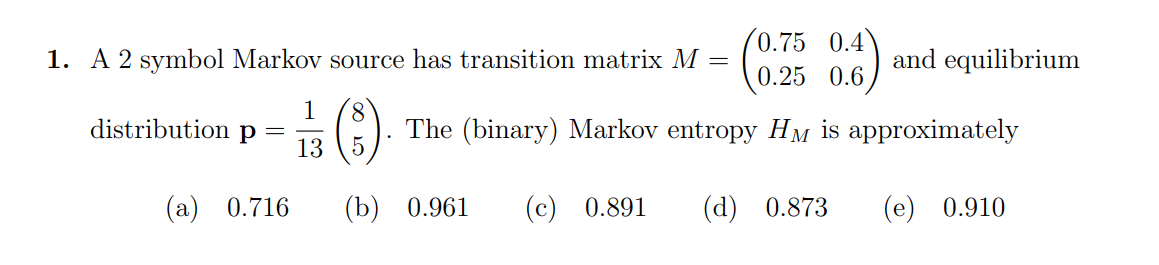

In [4]:
from IPython.display import Image

# Display the image
Image(filename='/home/cbjs/math3411/2018T3exam/2018q1.png')

A 2-symbol Markov source has transition matrix 

$$
M = \begin{pmatrix} 0.75 & 0.4 \\ 0.25 & 0.6 \end{pmatrix}
$$

and equilibrium distribution 

$$
\mathbf{p} = \frac{1}{13} \begin{pmatrix} 8 \\ 5 \end{pmatrix}.
$$ 

The (binary) Markov entropy \( H_M \) is approximately: 

- (a) 0.716  
- (b) 0.961  
- (c) 0.891  
- (d) 0.873  
- (e) 0.910


In [5]:
# Import necessary libraries
import numpy as np

# Function to calculate the binary Markov entropy
def calculate_markov_entropy(transition_matrix, equilibrium_distribution):
    """
    Calculate the binary Markov entropy H_M for a given transition matrix and equilibrium distribution.
    
    Parameters:
        transition_matrix (2D numpy array): The transition matrix M of the Markov source
        equilibrium_distribution (1D numpy array): The equilibrium distribution p of the Markov source
    
    Returns:
        float: The calculated Markov entropy H_M
    """
    # Use numpy operations to handle the calculation
    markov_entropy = -np.sum(equilibrium_distribution * (transition_matrix * np.log2(transition_matrix + (transition_matrix == 0))))
    return markov_entropy

# Define the transition matrix M and equilibrium distribution p
transition_matrix = np.array([[0.75, 0.4],
                              [0.25, 0.6]])

equilibrium_distribution = np.array([8 / 13, 5 / 13])

# Calculate the Markov entropy H_M
H_M = calculate_markov_entropy(transition_matrix, equilibrium_distribution)

# Display the result
print(f"The binary Markov entropy H_M is approximately: {H_M:.3f}")

The binary Markov entropy H_M is approximately: 0.873


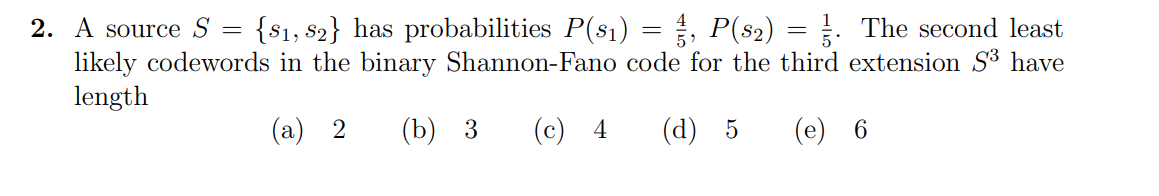

In [10]:
from IPython.display import Image

Image(filename='/home/cbjs/math3411/2018T3exam/2018q2.png')


In [9]:
# Import necessary libraries
import numpy as np

# Function to calculate the codeword lengths for Shannon-Fano encoding for a given extension order
def shannon_fano_codeword_lengths(probabilities, extension_order):
    """
    Calculate the Shannon-Fano codeword lengths for the second least likely symbol
    in a binary source extended to a given order.

    Parameters:
        probabilities (list): Probabilities of the symbols in the original source.
        extension_order (int): The order of the extension (e.g., 3 for S^3).

    Returns:
        int: Length of the second least likely codeword in the extended Shannon-Fano code.
    """
    # Calculate the probabilities of all sequences of the extension order
    extended_probs = [np.prod(p) for p in np.array(np.meshgrid(*[probabilities] * extension_order)).T.reshape(-1, extension_order)]
    
    # Sort the probabilities in ascending order to find the second least likely one
    sorted_probs = sorted(extended_probs)
    
    # Calculate Shannon-Fano codeword lengths based on sorted probabilities
    # The length of the codeword is -log2(probability), rounded up to the nearest integer
    codeword_lengths = [int(np.ceil(-np.log2(p))) for p in sorted_probs]
    
    # Return the length of the second least likely codeword
    return codeword_lengths[1]  # Second least likely

# Define the probabilities for s1 and s2
probabilities = [4/5, 1/5]  # Modify these values for different probabilities

# Define the extension order (e.g., 3 for S^3)
extension_order = 3  # Modify this value for a different extension order

# Calculate the second least likely codeword length
second_least_likely_length = shannon_fano_codeword_lengths(probabilities, extension_order)

# Display the result
print("Second least likely length:", second_least_likely_length)




Second least likely length: 5


In [ ]:
import numpy as np

# Define the entropy function H(x)
def H(x):
    """
    Calculate the entropy function H(x) = -x * log2(x) - (1 - x) * log2(1 - x)
    for a given probability x.
    """
    if x == 0 or x == 1:
        return 0
    return -x * np.log2(x) - (1 - x) * np.log2(1 - x)

# Function to calculate noise entropy H(B | A) based on provided probabilities
def calculate_noise_entropy(P_a1, P_a2, P_b1_given_a1, P_b2_given_a2):
    """
    Calculate the noise entropy H(B | A) for given probabilities.

    Parameters:
        P_a1 (float): Probability of a1
        P_a2 (float): Probability of a2
        P_b1_given_a1 (float): Conditional probability P(b1 | a1)
        P_b2_given_a2 (float): Conditional probability P(b2 | a2)
    
    Returns:
        float: The calculated noise entropy H(B | A)
    """
    # Calculate complementary probabilities
    P_b2_given_a1 = 1 - P_b1_given_a1  # Probability of b2 given a1
    P_b1_given_a2 = 1 - P_b2_given_a2  # Probability of b1 given a2

    # Calculate H(B | A) using different combinations to verify each option
    H_B_given_A_c = P_a1 * H(P_b2_given_a1) + P_a2 * H(P_b1_given_a2)
    H_B_given_A_a = P_a1 * H(P_b1_given_a1) + P_a2 * H(P_b2_given_a2)
    H_B_given_A_b = P_a2 * H(P_b1_given_a1)
    H_B_given_A_d = P_a1 * H(P_b2_given_a2)
    H_B_given_A_e = H(P_b1_given_a1) + H(P_b2_given_a2)

    # Print step-by-step calculation for option (c) and compare to other options
    print("Step-by-step calculation for option (c):")
    print(f"1. First term: ({P_a1:.3f}) * H({P_b2_given_a1:.3f}) = {(P_a1 * H(P_b2_given_a1)):.6f}")
    print(f"2. Second term: ({P_a2:.3f}) * H({P_b1_given_a2:.3f}) = {(P_a2 * H(P_b1_given_a2)):.6f}")
    print(f"\nNoise Entropy H(B|A) for option (c) = {H_B_given_A_c:.6f}")

    print("\nVerifying other options:")
    print(f"Option (a): H(B|A) = {H_B_given_A_a:.6f}")
    print(f"Option (b): H(B|A) = {H_B_given_A_b:.6f}")
    print(f"Option (c): H(B|A) = {H_B_given_A_c:.6f}  [CORRECT]")
    print(f"Option (d): H(B|A) = {H_B_given_A_d:.6f}")
    print(f"Option (e): H(B|A) = {H_B_given_A_e:.6f}")

# Example values for probabilities
P_a1 = 3 / 7       # P(a1)
P_a2 = 4 / 7       # P(a2)
P_b1_given_a1 = 4 / 5  # P(b1 | a1)
P_b2_given_a2 = 5 / 8  # P(b2 | a2)

# Calculate and display the noise entropy H(B | A)
calculate_noise_entropy(P_a1, P_a2, P_b1_given_a1, P_b2_given_a2)


Step by step calculation:
1. First term: (3/7) * H(1/5) = 0.309398
2. Second term: (4/7) * H(3/8) = 0.545391

Noise Entropy H(B|A) = 0.854789

Verifying other options:
Option (a): (4/7 * H(4/5) + 3/7 * H(5/8)) = 0.821573
Option (b): (4/7 * H(1/5)) = 0.412530
Option (c): (3/7 * H(1/5) + 4/7 * H(3/8)) = 0.854789  [CORRECT]
Option (d): (3/7 * H(5/8)) = 0.409043
Option (e): H(1/5) + H(3/8) = 1.676362
